In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

###############################################################################################################
###############################################################################################################

from sklearn.metrics import confusion_matrix

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

['fashionmnist-testcsv', 'fashionmnist-train']


# Readin train and test datasets

In [11]:
#reading train dataset
train = pd.read_csv("/kaggle/input/fashionmnist-train/fashion-mnist_train.csv")
print(train.shape)

# reading test dataset
test = pd.read_csv("/kaggle/input/fashionmnist-testcsv/fashion-mnist_test.csv")
print(test.shape)

(60000, 785)
(10000, 785)


In [12]:
#train.head()
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# put labels into Y_train variable
Y = train["label"].values
# Drop 'label' column
X = train.drop(labels = ["label"], axis = 1)
X.head()



# put labels into Y_test variable
Y_test = test["label"].values
# Drop 'label' column
X_test = test.drop(labels = ["label"], axis = 1)
#X_test.head()

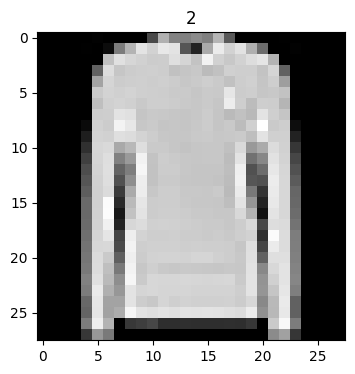

In [37]:
import random

# plot random samples
inx = random.randint(0, len(X)-1)

plt.figure(figsize=(4,4))
plt.title(Y[inx])
plt.imshow(X.values.reshape(-1,28,28)[inx],cmap="gray")

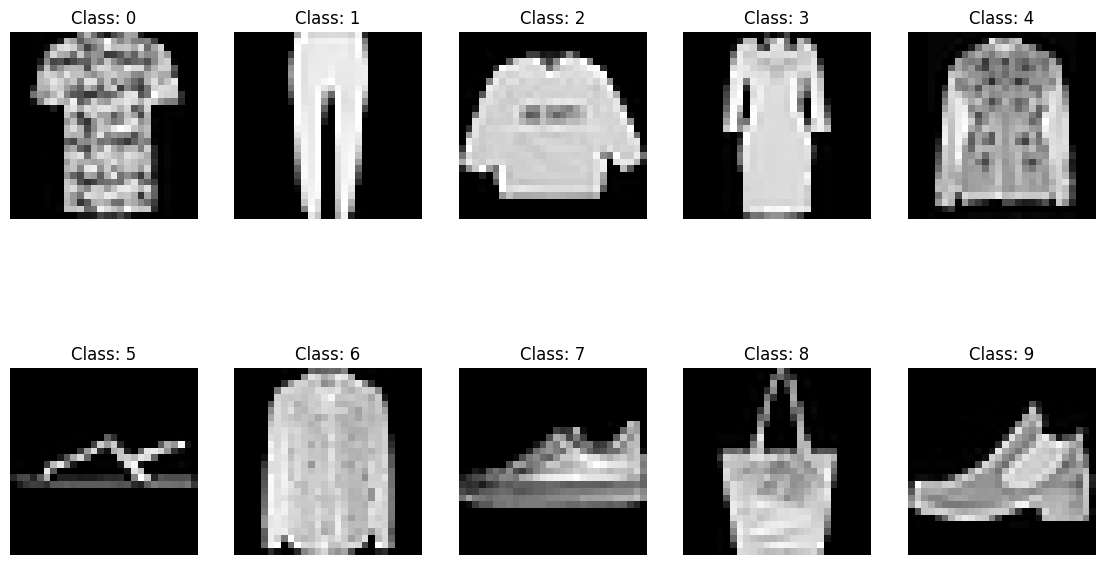

In [21]:
plt.figure(figsize = (14,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train[train.label == i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

# Datasets preprocessing

In [38]:
# Normalize the data
X = X / 255.0
X_test = X_test / 255.0
print("train shape: ",X.shape)
print("test shape: ",X_test.shape)

X.head()
#X_test.head()

train shape:  (60000, 784)
test shape:  (10000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [41]:
# Reshaping
X = X.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("train new shape: ",X.shape)
print("test new shape: ",X_test.shape)

train new shape:  (60000, 28, 28, 1)
test new shape:  (10000, 28, 28, 1)


In [42]:
# Label Encoding 
from keras.utils.np_utils import to_categorical 

# convert to one-hot-encoding(one hot vectors)
Y = to_categorical(Y, num_classes = 10)
# convert to one-hot-encoding(one hot vectors)
Y_test = to_categorical(Y_test, num_classes = 10)

print(Y.shape)
print(Y_test.shape)



(60000, 10)
(10000, 10)


In [43]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1, random_state = 2)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape :",y_val.shape)

x_train shape:  (54000, 28, 28, 1)
x_val shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_val shape : (6000, 10)


### Data Augmentation

In [44]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)



# Convolutional Neural Network

## Simple CNN model

In [45]:
model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))



model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)       

In [ ]:
# # save the best weights
# checkpointer = ModelCheckpoint(filepath="/kaggle/working/fashion_mnist_model.h5", verbose=1, save_best_only=True)

In [47]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 50 # for better result increase the epochs
batch_size = 100

In [48]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              shuffle=True, #veriler random gelip eğitilir
                              epochs=epochs, validation_data = (x_val, y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size)
#                               callbacks=[checkpointer]) #we save the best weights with checkpointer

Epoch 1/50
540/540 - 25s - loss: 0.5111 - accuracy: 0.8094 - val_loss: 0.3523 - val_accuracy: 0.8807 - 25s/epoch - 47ms/step
Epoch 2/50
540/540 - 16s - loss: 0.3557 - accuracy: 0.8678 - val_loss: 0.4207 - val_accuracy: 0.8302 - 16s/epoch - 29ms/step
Epoch 3/50
540/540 - 17s - loss: 0.3156 - accuracy: 0.8832 - val_loss: 0.2289 - val_accuracy: 0.9153 - 17s/epoch - 32ms/step
Epoch 4/50
540/540 - 15s - loss: 0.2917 - accuracy: 0.8914 - val_loss: 0.2920 - val_accuracy: 0.8840 - 15s/epoch - 28ms/step
Epoch 5/50
540/540 - 16s - loss: 0.2733 - accuracy: 0.8984 - val_loss: 0.2276 - val_accuracy: 0.9143 - 16s/epoch - 29ms/step
Epoch 6/50
540/540 - 15s - loss: 0.2585 - accuracy: 0.9056 - val_loss: 0.2326 - val_accuracy: 0.9148 - 15s/epoch - 28ms/step
Epoch 7/50
540/540 - 15s - loss: 0.2473 - accuracy: 0.9084 - val_loss: 0.2216 - val_accuracy: 0.9185 - 15s/epoch - 29ms/step
Epoch 8/50
540/540 - 15s - loss: 0.2367 - accuracy: 0.9117 - val_loss: 0.1992 - val_accuracy: 0.9292 - 15s/epoch - 28ms/step


### Model validation

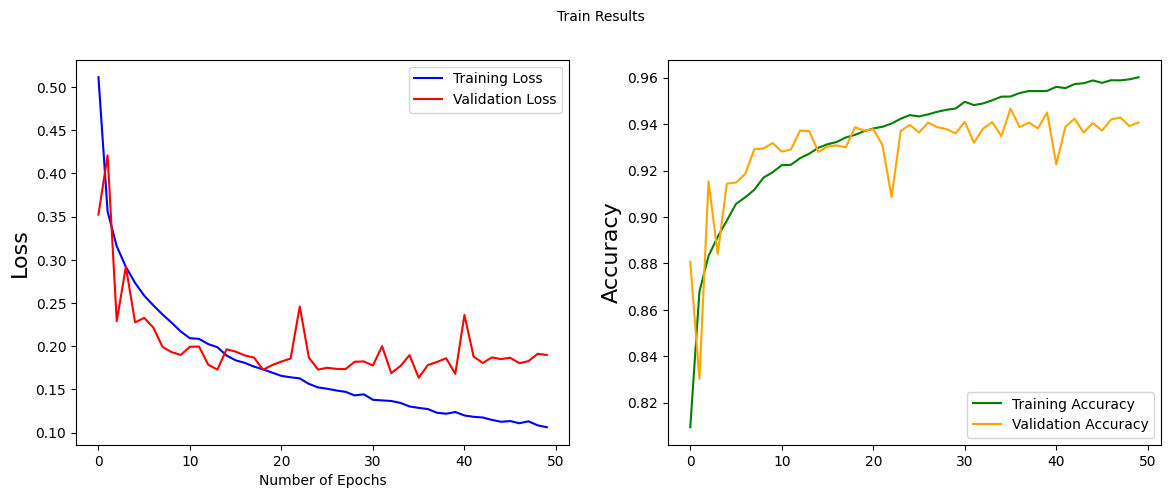

In [50]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [51]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])

Train accuracy of the model:  0.960185170173645
Validation accuracy of the model:  0.940666675567627


In [52]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.18978190422058105
Test Accuracy: 0.9433000087738037


### Predict For Random Sample from Test set

In [61]:
inx = random.randint(0, len(Y_test)-1)

trueY = Y_test[inx]
img = X_test[inx]
test_img = img.reshape(1,28,28,1)

preds = (model.predict(test_img) > 0.5).astype("int32")
prob = model.predict(test_img)

print("trueY: ",np.argmax(trueY))#içlerinden en yüksek olan değeri seçer
print("Preds: ",preds)
print("Prob: ",np.round(prob*100,2))

1/1 [==============================] - 0s 25ms/step
trueY:  1
Preds:  [[0 1 0 0 0 0 0 0 0 0]]
Prob:  [[  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]]
